In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.neural_network import MLPClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning

In [2]:
df = pd.read_csv('training.csv')
dftest = pd.read_csv('testing.csv')

In [3]:
target_column_name = 'class'
X = df.drop(target_column_name, axis=1)
y = df[target_column_name]

X_train = df.drop(target_column_name, axis=1)
y_train = df[target_column_name]

X_test = dftest.drop(target_column_name, axis= 1)
y_test = dftest['class']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k=1, CV Mean Accuracy: 0.7431
k=2, CV Mean Accuracy: 0.7729
k=3, CV Mean Accuracy: 0.7679
k=4, CV Mean Accuracy: 0.7622
k=5, CV Mean Accuracy: 0.7918
k=6, CV Mean Accuracy: 0.7742
k=7, CV Mean Accuracy: 0.7742
k=8, CV Mean Accuracy: 0.7679
k=9, CV Mean Accuracy: 0.7918
k=10, CV Mean Accuracy: 0.7738
k=11, CV Mean Accuracy: 0.7799
k=12, CV Mean Accuracy: 0.7677
k=13, CV Mean Accuracy: 0.7619
k=14, CV Mean Accuracy: 0.7558
k=15, CV Mean Accuracy: 0.7383
k=16, CV Mean Accuracy: 0.7439
k=17, CV Mean Accuracy: 0.7501
k=18, CV Mean Accuracy: 0.7378
k=19, CV Mean Accuracy: 0.7201
k=20, CV Mean Accuracy: 0.7082

Best k based on cross-validation: 5 with CV accuracy: 0.7918


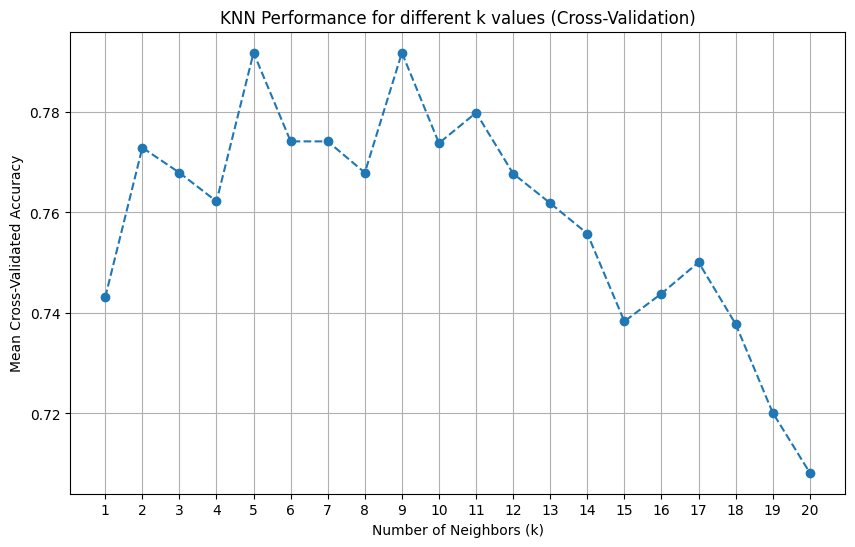

In [4]:
k_range = range(1, 21) # Test k values from 1 to 30 (adjust as needed)
cv_scores = [] # To store cross-validation scores for each k

for k_val in k_range:
    knn = KNeighborsClassifier(n_neighbors=k_val)
    # Perform 5-fold cross-validation (cv=5)
    # 'accuracy' is a common scoring metric. For imbalanced data, consider 'f1_macro', 'f1_weighted', etc.
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    print(f"k={k_val}, CV Mean Accuracy: {scores.mean():.4f}")

best_k_cv = k_range[np.argmax(cv_scores)]
print(f"\nBest k based on cross-validation: {best_k_cv} with CV accuracy: {max(cv_scores):.4f}")

plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores, marker='o', linestyle='dashed')
plt.title('KNN Performance for different k values (Cross-Validation)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [5]:
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)

knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Accuracy (k={k}): {accuracy:.4f}")

# Optional: Print more detailed evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


KNN Model Accuracy (k=5): 0.7239

Classification Report:
              precision    recall  f1-score   support

    asphalt        0.76      0.71      0.74        45
   building        0.86      0.67      0.75        97
        car        0.94      0.81      0.87        21
   concrete        0.72      0.82      0.76        93
      grass        0.65      0.71      0.68        83
       pool        0.79      0.79      0.79        14
     shadow        0.70      0.69      0.70        45
       soil        0.25      0.35      0.29        20
       tree        0.78      0.78      0.78        89

    accuracy                           0.72       507
   macro avg       0.72      0.70      0.71       507
weighted avg       0.74      0.72      0.73       507



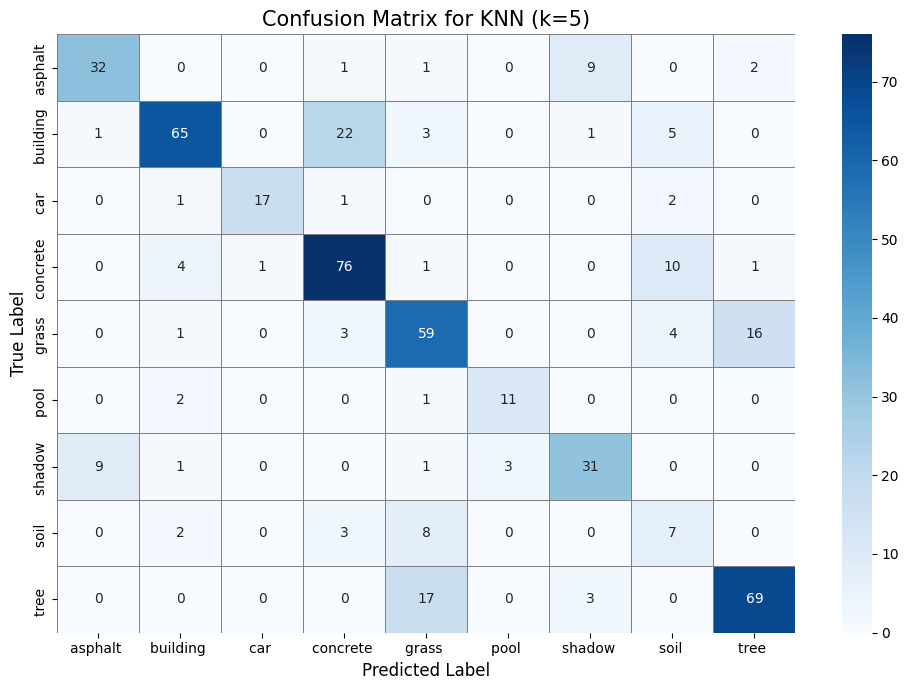

In [6]:
class_labels = np.unique(np.concatenate((y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred, labels=class_labels)

cm_df = pd.DataFrame(cm,
                     index = class_labels,
                     columns = class_labels)

plt.figure(figsize=(10, 7)) # Adjust figure size
sns.heatmap(cm_df,
            annot=True,      # Display the numbers in each cell
            fmt='d',         # Format numbers as integers
            cmap='Blues',    # Colormap
            linewidths=.5,
            linecolor='gray',
            cbar=True)

plt.title(f'Confusion Matrix for KNN (k={best_k_cv})', fontsize=15)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
# plt.xticks(rotation=45, ha='right') # Uncomment if class names are long
# plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [7]:
top_5_feature_names = ['Mean_NIR', 'NDVI', 'NDVI_40', 'Mean_NIR_60', 'NDVI_60']
X_train_top5 = X_train[top_5_feature_names]
X_test_top5 = X_test[top_5_feature_names]

X_train_top5_scaled = scaler.fit_transform(X_train_top5)
X_test_top5_scaled = scaler.fit_transform(X_test_top5)


In [8]:
warnings.filterwarnings("ignore", category = ConvergenceWarning)


neurons = 20
range_of_iterations = range(1, 201)
accuracies = []
iteration_counts = []
best_accuracy = 0.0
best_iterations = 0

for n_iter in range_of_iterations:
    mlp = MLPClassifier(hidden_layer_sizes = (neurons), max_iter= n_iter, random_state=42)
    mlp.fit(X_train_top5_scaled, y_train)
    y_pred = mlp.predict(X_test_top5_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    iteration_counts.append(n_iter)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_iterations = n_iter


print("\n--- Results ---")
print(f"Chosen number of neurons in the hidden layer (k): {neurons}")
print(f"Best number of iterations found: {best_iterations}")
print(f"Highest accuracy (baseline): {best_accuracy:.4f}")

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: in


--- Results ---
Chosen number of neurons in the hidden layer (k): 20
Best number of iterations found: 200
Highest accuracy (baseline): 0.5148


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: in

In [9]:
warnings.filterwarnings("ignore", category = ConvergenceWarning)


neurons = 20
range_of_iterations = range(1, 201)
accuracies = []
iteration_counts = []
best_accuracy = 0.0
best_iterations = 0

for n_iter in range_of_iterations:
    mlp = MLPClassifier(hidden_layer_sizes = (neurons), max_iter= n_iter, random_state=42)
    mlp.fit(X_train_scaled, y_train)
    y_pred = mlp.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    iteration_counts.append(n_iter)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_iterations = n_iter


print("\n--- Results ---")
print(f"Chosen number of neurons in the hidden layer (k): {neurons}")
print(f"Best number of iterations found: {best_iterations}")
print(f"Highest accuracy (baseline): {best_accuracy:.4f}")

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: in


--- Results ---
Chosen number of neurons in the hidden layer (k): 20
Best number of iterations found: 127
Highest accuracy (baseline): 0.7515


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: in

LabelEncoder classes (mapping): ['asphalt ' 'building ' 'car ' 'concrete ' 'grass ' 'pool ' 'shadow '
 'soil ' 'tree ']

--- Baseline Model Results ---
Number of neurons: 20
Best number of iterations (found by early stopping): 18
Highest validation accuracy during training: 0.4118
Final accuracy on test set: 0.2880


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: in

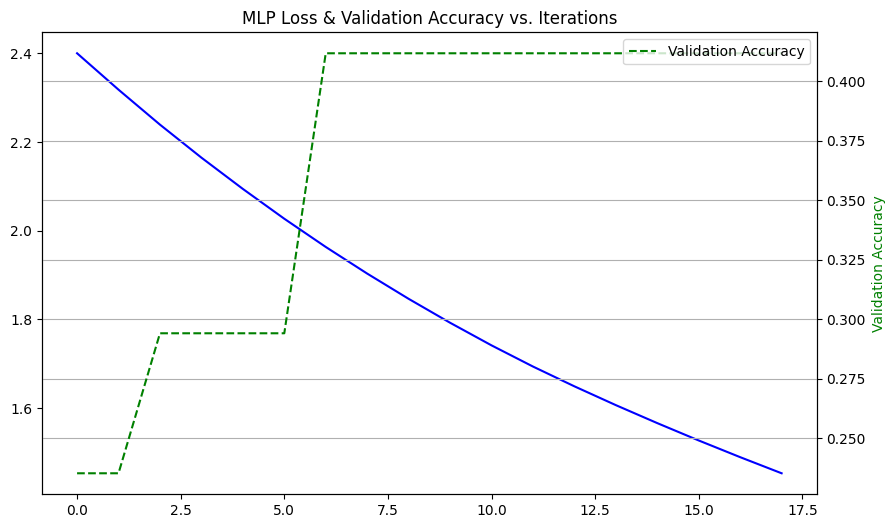

In [13]:
from sklearn.preprocessing import LabelEncoder

# 1. Initialize the encoder
le = LabelEncoder()

# 2. Fit the encoder on the training labels and transform them to integers
y_train_encoded = le.fit_transform(y_train)

# 3. Use the SAME fitted encoder to transform the test labels
y_test_encoded = le.transform(y_test)

# You can see the mapping it learned
print("LabelEncoder classes (mapping):", le.classes_)

neurons_k = 20
mlp = MLPClassifier(
    hidden_layer_sizes=(neurons_k,),
    max_iter=200,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10
)

mlp.fit(X_train_scaled, y_train_encoded)

best_iterations = mlp.n_iter_
best_validation_accuracy = max(mlp.validation_scores_)
final_test_accuracy = mlp.score(X_test_scaled, y_test_encoded)

print("\n--- Baseline Model Results ---")
print(f"Number of neurons: {neurons_k}")
print(f"Best number of iterations (found by early stopping): {best_iterations}")
print(f"Highest validation accuracy during training: {best_validation_accuracy:.4f}")
print(f"Final accuracy on test set: {final_test_accuracy:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_, label='Training Loss', color='blue')

ax2 = plt.gca().twinx()
ax2.plot(mlp.validation_scores_, label='Validation Accuracy', color='green', linestyle='--')

plt.title('MLP Loss & Validation Accuracy vs. Iterations')
plt.xlabel('Iteration (Epoch)')
plt.ylabel('Training Loss', color='blue')
ax2.set_ylabel('Validation Accuracy', color='green')
plt.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid(True)
plt.show()